# Laboratorio No.8
- Paola de León 20361
- Gabriela Contraras 20213

In [15]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

**CARGAR CONJUNTO DE DATOS**

In [16]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [17]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


**EXPLORACIÓN DE DATOS**

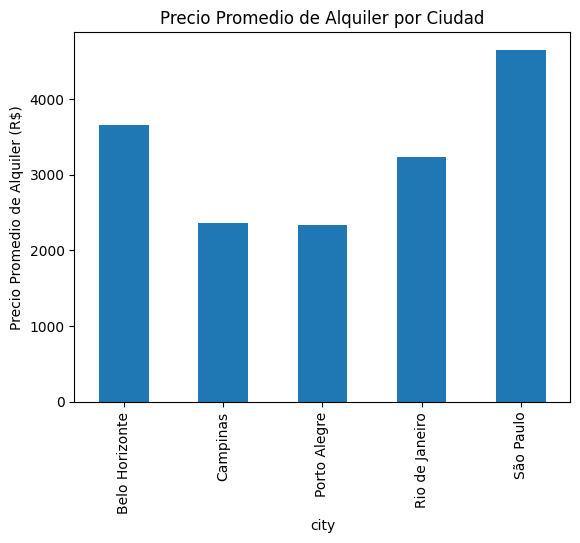

In [19]:
# Gráfico de barras para comparar el precio promedio de alquiler por ciudad
grupo_ciudad = df.groupby('city')
promedio_por_ciudad = grupo_ciudad['rent amount (R$)'].mean()
promedio_por_ciudad.plot(kind='bar')
plt.title('Precio Promedio de Alquiler por Ciudad')
plt.ylabel('Precio Promedio de Alquiler (R$)')
plt.show()

C:\Users\Contreras GP\AppData\Local\Temp\ipykernel_24076\1243751953.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


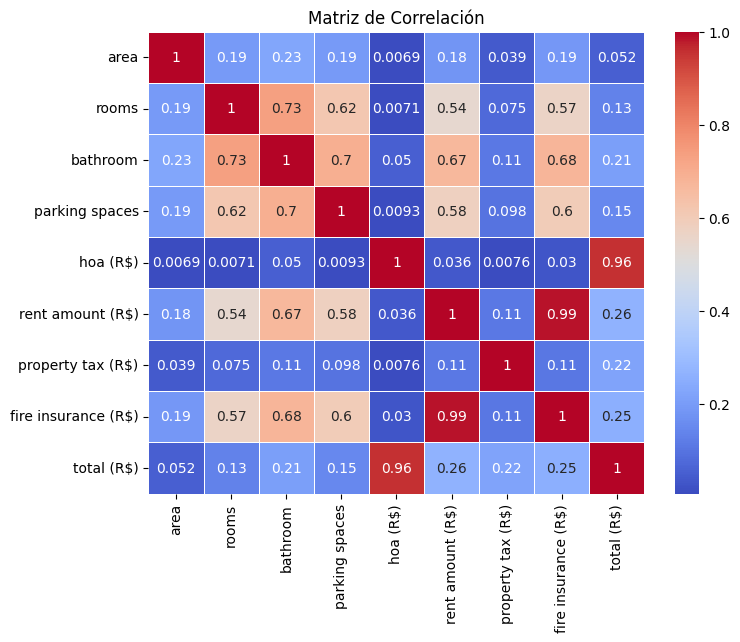

In [20]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

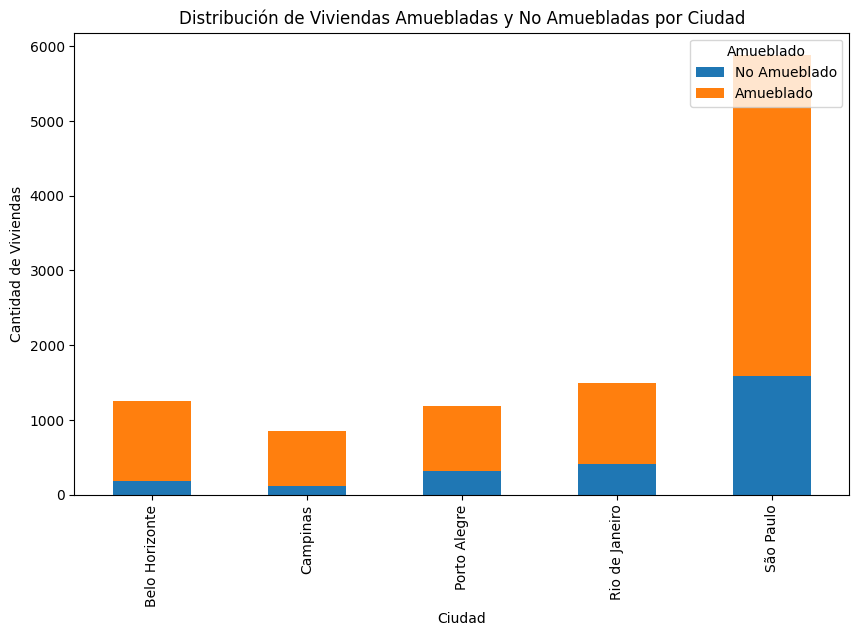

In [21]:
data_grouped = df.groupby(['city', 'furniture']).size().unstack()
ax = data_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Viviendas Amuebladas y No Amuebladas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Viviendas')
plt.legend(title='Amueblado', labels=['No Amueblado', 'Amueblado'], loc='upper right')
plt.show()

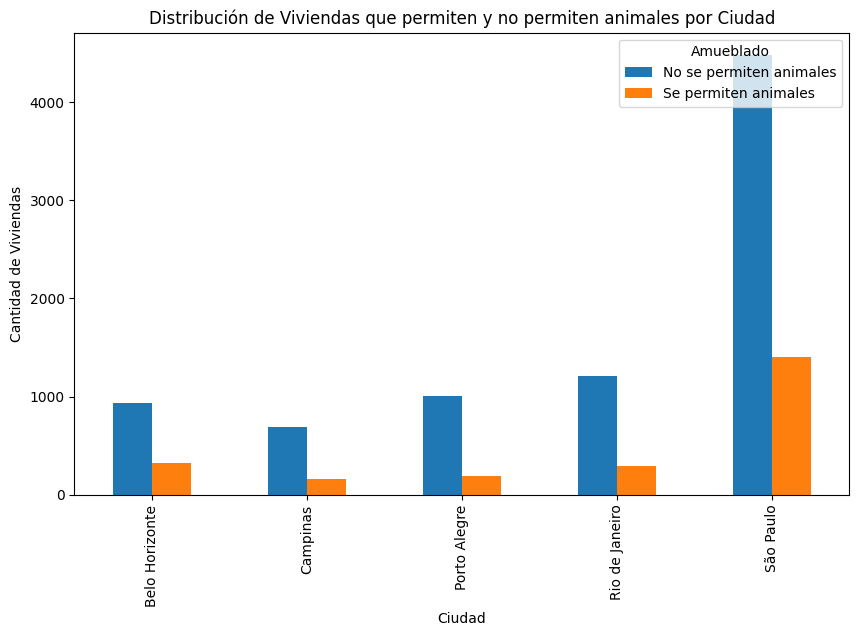

In [22]:
data_grouped = df.groupby(['city', 'animal']).size().unstack()
ax = data_grouped.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Distribución de Viviendas que permiten y no permiten animales por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Viviendas')
plt.legend(title='Amueblado', labels=['No se permiten animales', 'Se permiten animales'], loc='upper right')
plt.show()

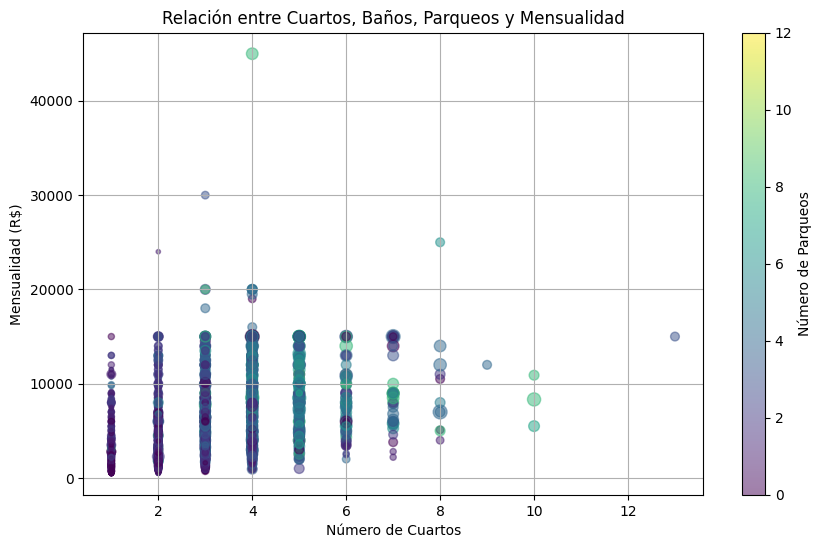

In [23]:
rooms = df['rooms']
bathrooms = df['bathroom']
parking_spaces = df['parking spaces']
rent_amount = df['rent amount (R$)']

# Crear un gráfico de dispersión múltiple
plt.figure(figsize=(10, 6))
plt.scatter(rooms, rent_amount, s=bathrooms * 10, c=parking_spaces, cmap='viridis', alpha=0.5)
plt.title('Relación entre Cuartos, Baños, Parqueos y Mensualidad')
plt.xlabel('Número de Cuartos')
plt.ylabel('Mensualidad (R$)')
plt.colorbar(label='Número de Parqueos')
plt.grid(True)
plt.show()

In [24]:
# Estadisticas descriptivas
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


**LIMPIEZA DE DATOS** 

In [25]:
# Ver si hay valores nulos
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [26]:
# Ver si hay variables categoricas
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [27]:
# Convertir variable de str a int -- tener en cuenta que ya eran valores numericos--
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floor'] = df['floor'].fillna(0)
df['floor'] = df['floor'].astype(int)

In [28]:
# Conversión de varibales categoricas 
df['animal'].replace({'not acept': 0, 'acept': 1}, inplace=True)
df['furniture'].replace({'not furnished': 0, 'furnished': 1}, inplace=True)

In [30]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,0,1,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,1,0,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,0,1,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,1,1,1585,12000,279,155,14020


**PREPROCESAMIENTO**

In [31]:
y = df["total (R$)"]

In [32]:
X = df.drop('total (R$)',axis = 1)
X = df.drop('city',axis = 1)

In [33]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = 101)

In [34]:
normalizador = MinMaxScaler()
X_normalizado = normalizador.fit_transform(X.values)

**MODELO**

In [55]:
modelo = Sequential()
modelo.add(Dense(units=4, activation='linear', input_shape=X_normalizado.shape[1:]))
modelo.add(LeakyReLU(alpha=0.5))
modelo.add(Dense(units=4, activation='linear'))
modelo.add(LeakyReLU(alpha=0.5))
modelo.add(Dense(units=1, activation='linear'))


modelo.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])


In [66]:
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
model.fit(X_entreno, y_entreno, epochs=100, batch_size=10)

Epoch 1/100
856/856 [==============================] - 2s 1ms/step - loss: 7278613.0000
Epoch 2/100
856/856 [==============================] - 1s 1ms/step - loss: 7152720.0000
Epoch 3/100
856/856 [==============================] - 1s 1ms/step - loss: 1847514.1250
Epoch 4/100
856/856 [==============================] - 1s 1ms/step - loss: 7692587.0000
Epoch 5/100
856/856 [==============================] - 1s 2ms/step - loss: 5399235.5000
Epoch 6/100
856/856 [==============================] - 1s 1ms/step - loss: 483482.8438
Epoch 7/100
856/856 [==============================] - 1s 2ms/step - loss: 3114243.2500
Epoch 8/100
856/856 [==============================] - 2s 3ms/step - loss: 8077236.5000
Epoch 9/100
856/856 [==============================] - 2s 2ms/step - loss: 3323485.2500
Epoch 10/100
856/856 [==============================] - 2s 2ms/step - loss: 5818877.0000
Epoch 11/100
856/856 [==============================] - 2s 2ms/step - loss: 8671611.0000
Epoch 12/100
856/856 [=========

In [74]:
y_pred = model.predict(X_prueba)

67/67 [==============================] - 0s 2ms/step


**VALIDACION**

In [77]:
mse = metrics.mean_squared_error(y_prueba, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))

Mean Squared Error: 434337.4680
Root Mean Squared Error: 659.0428


In [79]:
r2 = r2_score(y_prueba, y_pred)
print('R-squared:{:.4f}'.format(r2))

R-squared:0.9898
